# Домашнее задание по теме "Дисперсионный анализ и A/B-тесты"

Ниже представлено несколько блоков задач. Пожалуйста, выполните их в этом ноутбуке, загрузите в [Google Colab](https://colab.research.google.com/notebooks/welcome.ipynb?hl=ru) и предоставьте ссылку на него эксперту через Личный Кабинет.

In [5]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

### Блок 1

##### Задание № 1
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.

In [6]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Напишите Ваш код для решения задачи

##### Задание № 2
Допустим, вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы — водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`

In [7]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Напишите Ваш код для решения задачи

### Блок 2
#### Cookie Cats

Cookie Cats — чрезвычайно популярная мобильная игра, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки.

По мере прохождения уровней игроки время от времени сталкиваются с воротами, которые заставляют их ждать или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота дают игрокам вынужденный перерыв в игре, что, как мы надеемся, приведёт к увеличению времени, проведённому в игре, и продлению удовольствия от игры.

<b>Но где ставить ворота? </b>
Изначально первые ворота были размещены на уровне `30`. В этом проекте вам предлагается проанализировать A/B-тест, в котором создатели переместили первые ворота в Cookie Cats с `30` уровня на уровень `40`. В частности, вам надо рассмотреть влияние A/B-теста на удержание игроков.

In [ ]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения A/B-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.
* `version` - был ли игрок помещён в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).
* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - игрок вернулся и поиграл через 1 день после установки?
* `retention_7` - игрок вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

#### Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот.
    
**Замечание:** приведённых вспомогательных фрагментов кода не хватает для ответа на вопрос. 

Делать выводы необходимо, опираясь на статистические тесты, разобранные в лекции. 

Большим плюсом будет построение визуализиции для подтверждения ваших выводов. Рекомендуем использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и `matplotlib`

In [ ]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


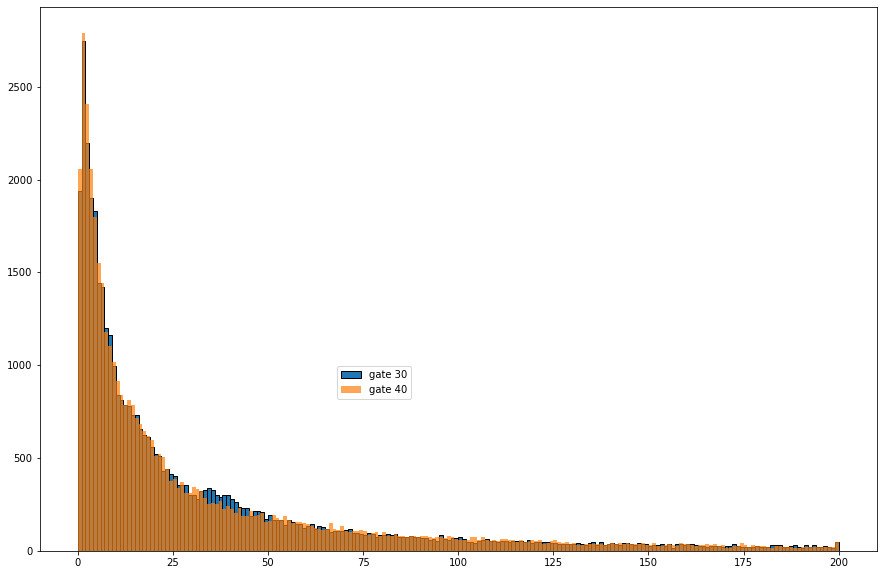

In [ ]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

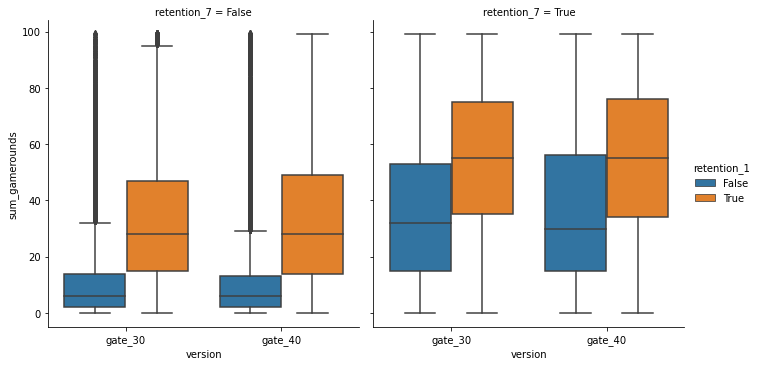

In [ ]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

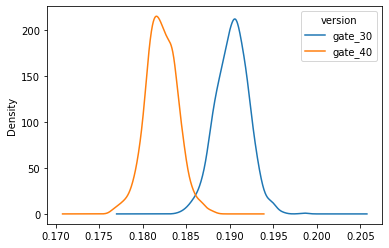

In [ ]:
#Если вдруг оказалось сложно, то вот ещё один способ визуализации различий
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

<span style="color:red">**ВОТ ТУТ ЯЧЕЙКА НИЖЕ - ЭТО, ПО СУТИ, РЕШЕНИЕ ЗАДАЧИ. УБРАТЬ БЫ ЕЁ ТОГДА**</span>

In [ ]:
from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

In [ ]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Напишите Ваш код для решения задачи

Ниже, пожалуйста, напишите Ваши выводы на основании решения:

### Блок 3
#### Покемоны и A/B-тестирование

Покемоны — это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.).

Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

**Описание набора данных**
Профессор Оук скопировал всё содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

**Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается, что они имеют одинаковую значимость.**

In [3]:
# Откроем датасет

pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

C:\Users\shali\AppData\Local\Temp\ipykernel_12192\3650493355.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


**Задание № 1**
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем покемоны в классе `rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [4]:
df = pokemon.copy()
df = df.drop(['pid'], axis = 1).drop(['HP'], axis = 1).drop(['Defense'], axis = 1).drop(['Sp. Atk'], axis = 1).drop(['Sp. Def'], axis = 1).drop(['Speed'], axis = 1).drop(['Legendary'], axis = 1)
df = df.drop(df.loc[(df['Class 1'] + df['Class 2']).isin(['GrassRock', 'RockGrass'])].index)
df = df.loc[df['Class 1'].isin(['Grass', 'Rock']) | df['Class 2'].isin(['Grass', 'Rock'])]

df

,Name,Class 1,Class 2,Attack
0,Bulbasaur,Grass,Poison,49
1,Ivysaur,Grass,Poison,62
2,Venusaur,Grass,Poison,82
3,Mega Venusaur,Grass,Poison,100
48,Oddish,Grass,Poison,50
...,...,...,...,...
785,Gourgeist Small Size,Ghost,Grass,85
786,Gourgeist Large Size,Ghost,Grass,95
787,Gourgeist Super Size,Ghost,Grass,100
795,Diancie,Rock,Fairy,100


**Задание № 2**
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос: а правда ли, что покемоны в классе `Water` в среднем быстрее покемонов в классе `Normal`. 

Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: 
- покемоны, которые относятся к обоим классам, не должны входить в выборку;
- Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

**Задание № 3:**
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. 
Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку некоторым покемонам (массив `treathed_pokemon`). 
Проверьте, работает ли вообще его сыворотка, и убедите всех в своем выводе статистически.
    
    
*Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.*

In [ ]:
# Покемоны, которые принимали сыворотку
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

**Задание № 4**
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. 
Оук предложил разобраться в этом Вам. 

Действительно ли сумма характеристик `HP`, `Attack`, `Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров? 

Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

**Задание № 5**
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса (массив `best_defence_class`), которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. 

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо. Все та же статистика Вам в помощь! 

*Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.*

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']